# Decoding Match-Mismatch Response Cross the Subjects

In [20]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from collections import Counter
%matplotlib inline

In [21]:
def score_func(y, y_pred):
    score = roc_auc_score(y, y_pred, multi_class="ovo")
    return score

In [22]:
my_scores = make_scorer(score_func=score_func, greater_is_better=True, needs_proba=True, needs_threshold=False)

## Set the path and load the dataset

In [23]:
os.getcwd()

'/Users/zhengyuanrui/Decoding_SALT/2_Data'

In [24]:
os.chdir("../2_Data")

In [25]:
df2 = pd.read_csv("Exp2_postpro.csv")


In [28]:
df2

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,correct_response,correct,word,Image,shape_en,valence,ACC,exp,matchness,trial_id
0,1,0,2000,5,408.81,psychophysics,822.0,f,f,image_first,f,True,常人,img/S_ambi40.png,square,Neutral,1,exp2,mismatch,1
1,1,0,2000,5,408.81,psychophysics,741.0,f,f,image_first,f,True,好人,img/T_ambi40.png,triangle,Good,1,exp2,mismatch,2
2,1,0,2000,5,408.81,psychophysics,781.0,j,j,image_first,j,True,常人,img/T_ambi40.png,triangle,Neutral,1,exp2,match,3
3,1,0,2000,5,408.81,psychophysics,683.0,f,f,image_first,f,True,坏人,img/C_ambi40.png,circle,Bad,1,exp2,mismatch,4
4,1,0,2000,5,408.81,psychophysics,599.0,j,j,image_first,j,True,常人,img/T_ambi40.png,triangle,Neutral,1,exp2,match,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,9,0,2003,4,433.63,psychophysics,693.0,j,j,image_first,j,True,好人,img/T_ambi40.png,triangle,Good,1,exp2,match,236
28796,9,0,2003,4,433.63,psychophysics,575.0,j,j,image_first,j,True,坏人,img/S_ambi40.png,square,Bad,1,exp2,match,237
28797,9,0,2003,4,433.63,psychophysics,501.0,j,j,image_first,j,True,好人,img/T_ambi40.png,triangle,Good,1,exp2,match,238
28798,9,0,2003,4,433.63,psychophysics,540.0,f,f,image_first,f,True,好人,img/S_ambi40.png,square,Good,1,exp2,mismatch,239


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28800 non-null  int64  
 1   gender            28800 non-null  int64  
 2   year              28800 non-null  int64  
 3   education         28800 non-null  int64  
 4   dist              28800 non-null  float64
 5   trial_type        28800 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28800 non-null  object 
 10  correct_response  28800 non-null  object 
 11  correct           28800 non-null  bool   
 12  word              28800 non-null  object 
 13  Image             28800 non-null  object 
 14  shape_en          28800 non-null  object 
 15  valence           28800 non-null  object 
 16  ACC               28800 non-null  int64 

<AxesSubplot: >

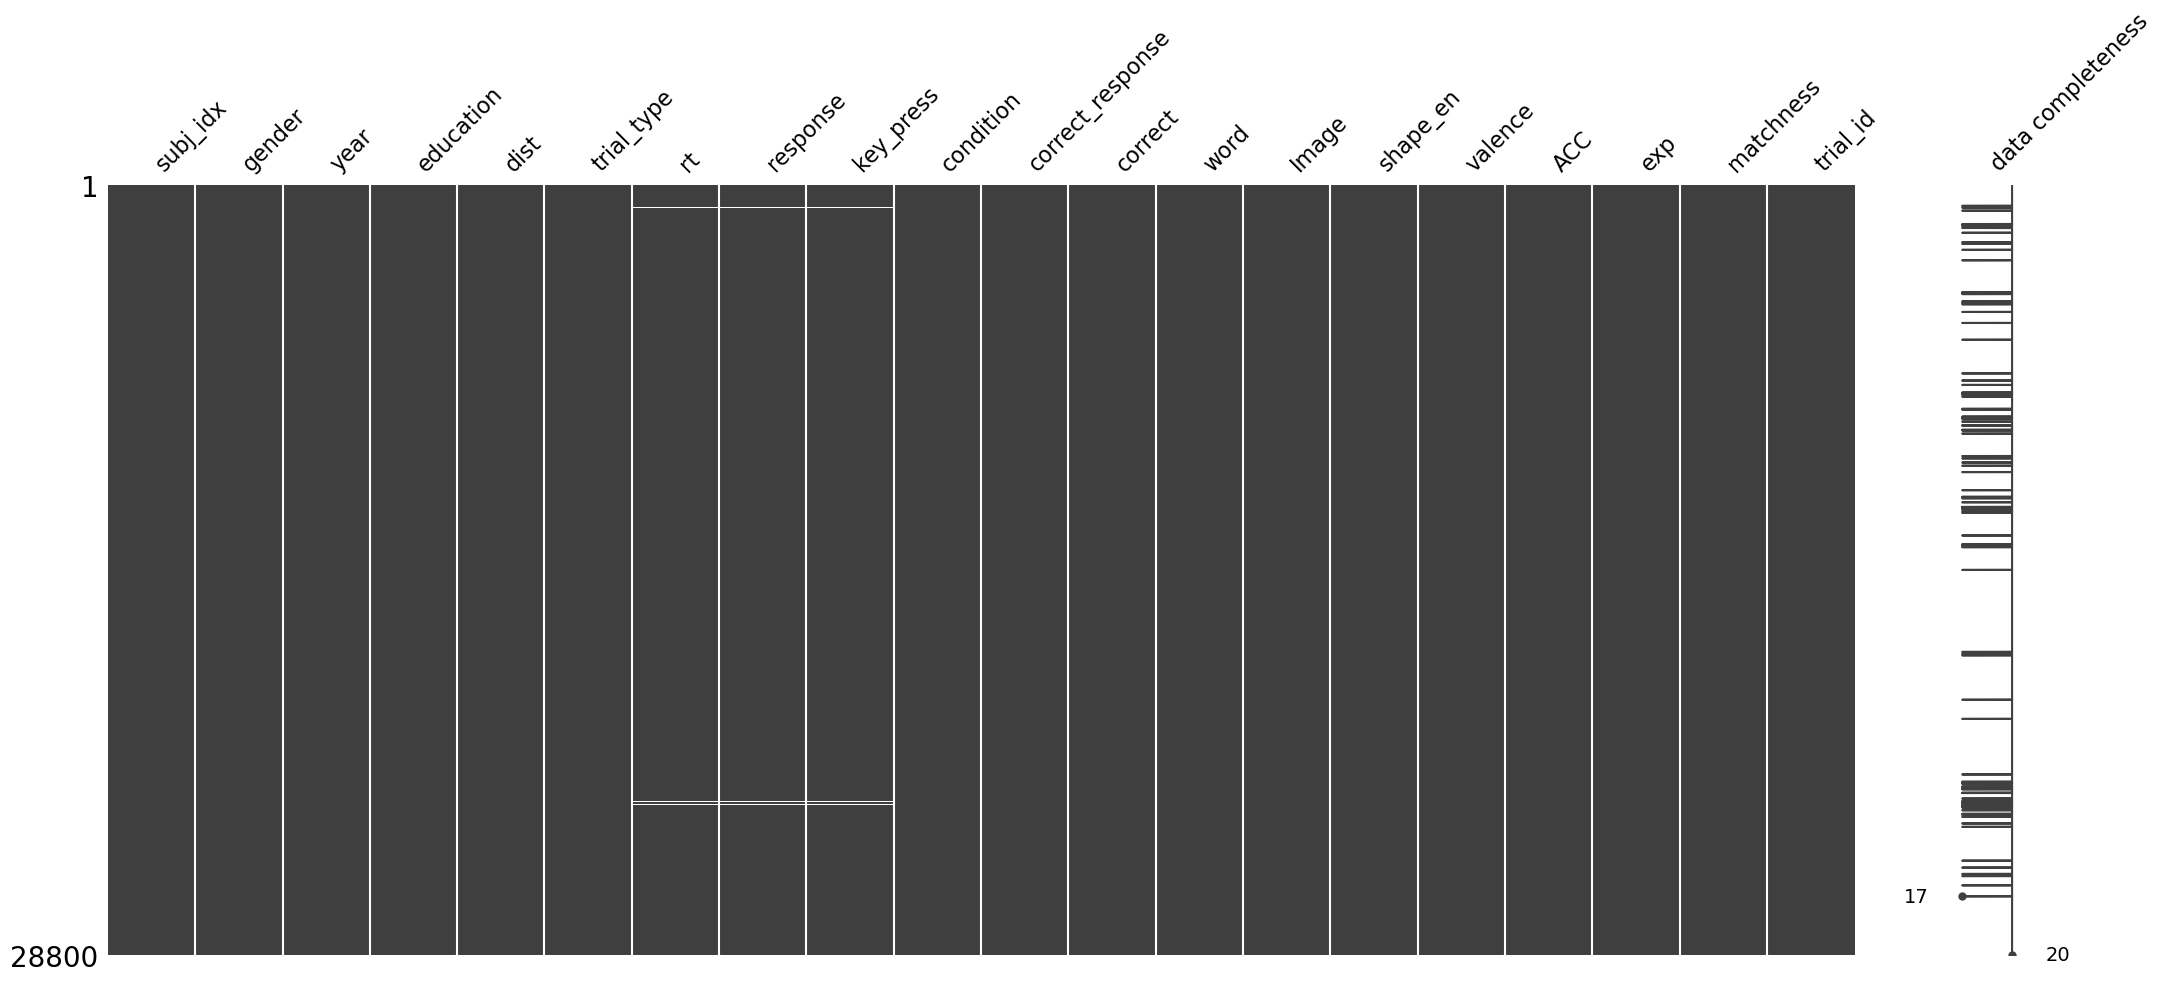

In [30]:
msno.matrix(df2, labels=True)

In [31]:
df2 = df2.dropna()

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28682 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28682 non-null  int64  
 1   gender            28682 non-null  int64  
 2   year              28682 non-null  int64  
 3   education         28682 non-null  int64  
 4   dist              28682 non-null  float64
 5   trial_type        28682 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28682 non-null  object 
 10  correct_response  28682 non-null  object 
 11  correct           28682 non-null  bool   
 12  word              28682 non-null  object 
 13  Image             28682 non-null  object 
 14  shape_en          28682 non-null  object 
 15  valence           28682 non-null  object 
 16  ACC               28682 non-null  int64 

<AxesSubplot: >

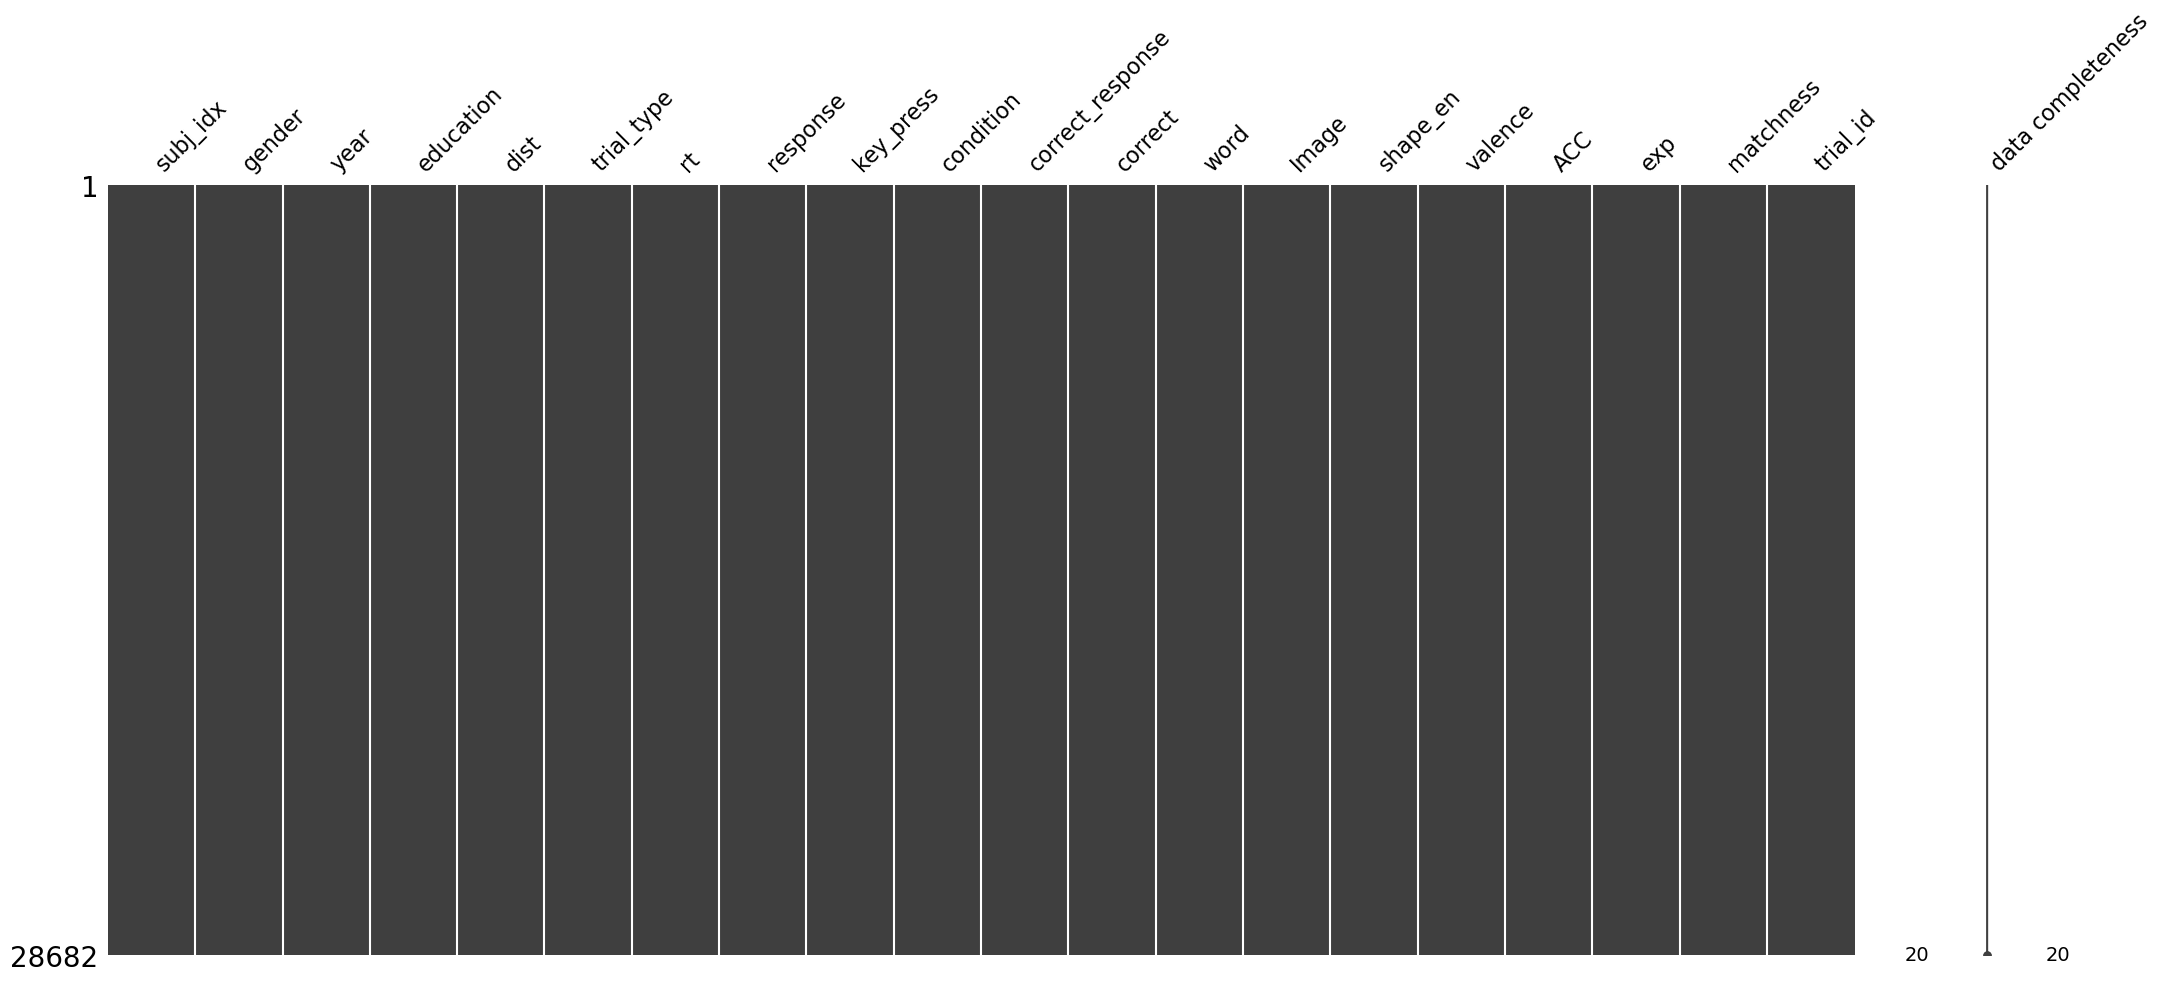

In [33]:
msno.matrix(df2, labels=True)

## Select the columns and split the dataset by condition

In [34]:
column = ['subj_idx', 'gender', 'year','education', 'condition', 'valence', 'matchness', 'rt', 'ACC', 'trial_id']

In [35]:
df2 = df2[column]

In [36]:
res_con = [
    (df2['matchness'] == 'match') & (df2['ACC'] == 1),
    (df2['matchness'] == 'match') & (df2['ACC'] == 0),
    (df2['matchness'] == 'mismatch') & (df2['ACC'] == 0),
    (df2['matchness'] == 'mismatch') & (df2['ACC'] == 1),
]

In [37]:
results = [1, 0, 1, 0]

In [38]:
df2["response"] = np.select(res_con, results)

In [39]:
df2.head()

,subj_idx,gender,year,education,condition,valence,matchness,rt,ACC,trial_id,response
0,1,0,2000,5,image_first,Neutral,mismatch,822.0,1,1,0
1,1,0,2000,5,image_first,Good,mismatch,741.0,1,2,0
2,1,0,2000,5,image_first,Neutral,match,781.0,1,3,1
3,1,0,2000,5,image_first,Bad,mismatch,683.0,1,4,0
4,1,0,2000,5,image_first,Neutral,match,599.0,1,5,1


In [40]:
onehot_v = pd.get_dummies(df2["valence"], prefix="valence")

In [41]:
onehot_m = pd.get_dummies(df2["matchness"], prefix="Match")

In [42]:
df2 = pd.concat([df2, onehot_v, onehot_m], axis=1)

In [43]:
df2 = df2.drop(["valence", "matchness"], axis=1)

In [45]:
df2.head()

,subj_idx,gender,year,education,condition,rt,ACC,trial_id,response,valence_Bad,valence_Good,valence_Neutral,Match_match,Match_mismatch
0,1,0,2000,5,image_first,822.0,1,1,0,0,0,1,0,1
1,1,0,2000,5,image_first,741.0,1,2,0,0,1,0,0,1
2,1,0,2000,5,image_first,781.0,1,3,1,0,0,1,1,0
3,1,0,2000,5,image_first,683.0,1,4,0,1,0,0,0,1
4,1,0,2000,5,image_first,599.0,1,5,1,0,0,1,1,0


In [46]:
df2["rt_log"] = np.log(df2["rt"])

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28682 entries, 0 to 28799
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subj_idx         28682 non-null  int64  
 1   gender           28682 non-null  int64  
 2   year             28682 non-null  int64  
 3   education        28682 non-null  int64  
 4   condition        28682 non-null  object 
 5   rt               28682 non-null  float64
 6   ACC              28682 non-null  int64  
 7   trial_id         28682 non-null  int64  
 8   response         28682 non-null  int64  
 9   valence_Bad      28682 non-null  uint8  
 10  valence_Good     28682 non-null  uint8  
 11  valence_Neutral  28682 non-null  uint8  
 12  Match_match      28682 non-null  uint8  
 13  Match_mismatch   28682 non-null  uint8  
 14  rt_log           28682 non-null  float64
dtypes: float64(2), int64(7), object(1), uint8(5)
memory usage: 2.5+ MB


In [48]:
df2_sim = df2[df2.condition == "simultaneous"]

In [49]:
df2_img = df2[df2.condition == "image_first"]

In [50]:
df2_word = df2[df2.condition == "word_first"]

In [51]:
df2_sim.head()

,subj_idx,gender,year,education,condition,rt,ACC,trial_id,response,valence_Bad,valence_Good,valence_Neutral,Match_match,Match_mismatch,rt_log
480,1,0,2000,5,simultaneous,980.0,1,1,0,1,0,0,0,1,6.887553
481,1,0,2000,5,simultaneous,779.0,1,2,0,0,0,1,0,1,6.658011
482,1,0,2000,5,simultaneous,738.0,1,3,1,0,1,0,1,0,6.603944
483,1,0,2000,5,simultaneous,763.0,1,4,1,0,0,1,1,0,6.637258
484,1,0,2000,5,simultaneous,660.0,1,5,1,0,1,0,1,0,6.492240


In [52]:
df2_img.head()

,subj_idx,gender,year,education,condition,rt,ACC,trial_id,response,valence_Bad,valence_Good,valence_Neutral,Match_match,Match_mismatch,rt_log
0,1,0,2000,5,image_first,822.0,1,1,0,0,0,1,0,1,6.711740
1,1,0,2000,5,image_first,741.0,1,2,0,0,1,0,0,1,6.608001
2,1,0,2000,5,image_first,781.0,1,3,1,0,0,1,1,0,6.660575
3,1,0,2000,5,image_first,683.0,1,4,0,1,0,0,0,1,6.526495
4,1,0,2000,5,image_first,599.0,1,5,1,0,0,1,1,0,6.395262


In [53]:
df2_word.head()

,subj_idx,gender,year,education,condition,rt,ACC,trial_id,response,valence_Bad,valence_Good,valence_Neutral,Match_match,Match_mismatch,rt_log
240,1,0,2000,5,word_first,761.0,1,1,0,0,0,1,0,1,6.634633
241,1,0,2000,5,word_first,745.0,1,2,0,0,1,0,0,1,6.613384
242,1,0,2000,5,word_first,639.0,1,3,1,1,0,0,1,0,6.459904
243,1,0,2000,5,word_first,566.0,1,4,1,0,1,0,1,0,6.338594
244,1,0,2000,5,word_first,510.0,1,5,1,0,1,0,1,0,6.234411


In [54]:
Counter(df2_sim["ACC"])

Counter({1: 8642, 0: 892})

In [55]:
Counter(df2_img["ACC"])

Counter({1: 8741, 0: 832})

In [56]:
Counter(df2_word["ACC"])

Counter({1: 8741, 0: 834})

In [57]:
pipe_lr = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(solver='saga', multi_class="multinomial", max_iter=1000, random_state=123)
)

In [59]:
logo = LeaveOneGroupOut()

In [60]:
df2_sim = df2_sim.dropna()

In [61]:
y_sim = df2_sim["Match_match"].values

In [62]:
y_sim.shape

(9534,)

In [65]:
y_img = df2_img["Match_match"].values

In [66]:
y_word = df2_word["Match_match"].values

In [67]:
y_img.shape

(9573,)

In [68]:
y_word.shape

(9575,)

In [93]:
X_sim = df2_sim[['rt_log', "ACC"]].values

In [94]:
X_img = df2_img[['rt_log', "ACC"]].values

In [95]:
X_word = df2_word[['rt_log', "ACC"]].values

In [96]:
X_sim.shape

(9534, 2)

In [97]:
X_img.shape

(9573, 2)

In [98]:
X_word.shape

(9575, 2)

In [99]:
groups = df2_sim["subj_idx"].values

In [100]:
np.unique(groups)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [101]:
##无法直接比较
roc_auc_img = []
roc_auc_word = []

for train, test in logo.split(X_sim, y_sim, groups=groups):
    logi = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(solver='saga', max_iter=1000, random_state=123))
    logi.fit(X=X_sim[train], y=y_sim[train])
    y_pred_img = logi.predict_proba(X_img)
    score_img = roc_auc_score(y_img, y_pred_img[:, -1])
    y_pred_word = logi.predict_proba(X_word)
    score_word = roc_auc_score(y_word, y_pred_word[:, -1])
    roc_auc_img.append(score_img)
    roc_auc_word.append(score_word)



In [114]:
##可以直接比较不同顺序
roc_auc_img2 = []
roc_auc_word2 = []
roc_auc_sim2 = []

for train, test in logo.split(X_sim, y_sim, groups=groups):
    test_sub = np.unique(groups[test])[0]

    logi = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(solver='saga', max_iter=1000, random_state=123))
    logi.fit(X=X_sim[train], y=y_sim[train])
    y_pre_sim = logi.predict_proba(X_sim[test])
    score_sim2 = roc_auc_score(y_sim[test], y_pre_sim[:, -1])
    y_pred_img = logi.predict_proba(X_img[df2_img["subj_idx"] == test_sub])
    score_img2 = roc_auc_score(y_img[df2_img["subj_idx"] == test_sub], y_pred_img[:, -1])
    y_pred_word = logi.predict_proba(X_word[df2_word["subj_idx"] == test_sub])
    score_word2 = roc_auc_score(y_word[df2_word["subj_idx"] == test_sub], y_pred_word[:, -1])
    roc_auc_sim2.append(score_sim2)
    roc_auc_img2.append(score_img2)
    roc_auc_word2.append(score_word2)


[0.7411805555555555,
 0.6478472222222222,
 0.5456597222222223,
 0.5486458333333334,
 0.6451330532212886,
 0.5437152777777778,
 0.6440972222222222,
 0.5583333333333333,
 0.6202083333333333,
 0.6407838983050848,
 0.6089985994397759,
 0.6345238095238095,
 0.6871527777777777,
 0.5503489531405783,
 0.5929971988795518,
 0.6672619047619047,
 0.6074652777777778,
 0.5566176470588236,
 0.582422969187675,
 0.37564437539721773,
 0.7073958333333332,
 0.557662429378531,
 0.5838935574229691,
 0.4962968238142715,
 0.6053221288515407,
 0.5078781512605042,
 0.6312152777777778,
 0.5046527777777778,
 0.6258680555555555,
 0.538263888888889,
 0.6632703081232493,
 0.5719097222222222,
 0.5787847222222222,
 0.7292366946778711,
 0.6501041666666666,
 0.657673611111111,
 0.600138888888889,
 0.5323179271708683,
 0.5789901129943503,
 0.5969791666666667]

### 黑魔法

In [91]:
logi2 = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(solver='saga', max_iter=1000, random_state=123))
logi2.fit(X=X_sim, y=y_sim)

roc_auc1 = []
for subj, df_sub in df2_img.groupby("subj_idx"):
    feature = df_sub["rt_log"].values.reshape(-1, 1)
    y_true = df_sub["Match_match"]
    y_pre = logi2.predict_proba(feature)
    roc_auc =  roc_auc_score(y_true, y_pre[:, -1])
    roc_auc1.append(roc_auc)


In [92]:
stats.ttest_1samp(roc_auc1, 0.5)

Ttest_1sampResult(statistic=9.123324506983213, pvalue=3.218665552255504e-11)

In [102]:
np.mean(roc_auc_img)

0.5853277179231939

In [103]:
np.mean(roc_auc_word)

0.5899584496175981

In [104]:
roc_auc_img

[0.5853030174863729,
 0.5854388938953212,
 0.5845564610781961,
 0.5852743407113394,
 0.5856186802520379,
 0.5853376740455456,
 0.5849902354926291,
 0.5855906581978956,
 0.5852541316598319,
 0.5854055031298714,
 0.5850400379284177,
 0.5859420250761593,
 0.5857262727184875,
 0.5846203181891154,
 0.5855907454940144,
 0.5852942005783717,
 0.5849382506538697,
 0.5853509430556069,
 0.5858631530328025,
 0.5851482414676992,
 0.5853238812587716,
 0.5850224914085342,
 0.5857035320795341,
 0.5852337916641459,
 0.5852279864722443,
 0.5848362887870842,
 0.585349677261884,
 0.5851501619823133,
 0.585411919394605,
 0.5853019699329469,
 0.585617632698612,
 0.5852938513938963,
 0.5857310740050228,
 0.5854552182695413,
 0.5852860383912617,
 0.5855414231868793,
 0.5855138376133311,
 0.5855434309976122,
 0.5851649150263944,
 0.5851158109595563]

In [105]:
from scipy import stats

In [106]:
stats.ttest_1samp(roc_auc_img, 0.5)

Ttest_1sampResult(statistic=1788.8732188771721, pvalue=1.8996795074087673e-97)

In [107]:
stats.ttest_1samp(roc_auc_word, 0.5)

Ttest_1sampResult(statistic=8543.305726368688, pvalue=6.251260123738368e-124)

In [130]:
sim_scores_lr = cross_validate(pipe_lr, X_sim, y_sim, groups=sim_groups, cv=logo, scoring=my_scores)

In [131]:
sim_scores_lr['test_score'].mean()

0.9173395044551025

In [81]:
score_sim_lr, perm_scores_sim_lr, pvalue_sim_lr = permutation_test_score(pipe_lr, X_sim, y_sim, cv=logo, groups=sim_groups, n_permutations=100, n_jobs=-1, random_state=123, verbose=1, scoring=my_scores, fit_params=None)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


In [82]:
pi_mean = []
pi_std = []
from sklearn.inspection import permutation_importance
for train_ix, test_ix in logo.split(X = X_sim, groups=sim_groups):
    X_train, X_test = X_sim[train_ix, :], X_sim[test_ix, :]
    y_train, y_test = y_sim[train_ix], y_sim[test_ix]
    clf = pipe_lr.fit(X_train, y_train)
    result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=0)
    pi_mean.append(result["importances_mean"])
    pi_std.append(result["importances_std"])


In [83]:
pimean_df = pd.DataFrame(pi_mean)

In [85]:
pimean_df.columns = ['rt_log', "ACC", "valence_Good", "valence_Neutral", "valence_Bad", "Match_match", "Match_mismatch"]

In [86]:
plot = pimean_df.melt(ignore_index=False)

<AxesSubplot: xlabel='variable', ylabel='value'>

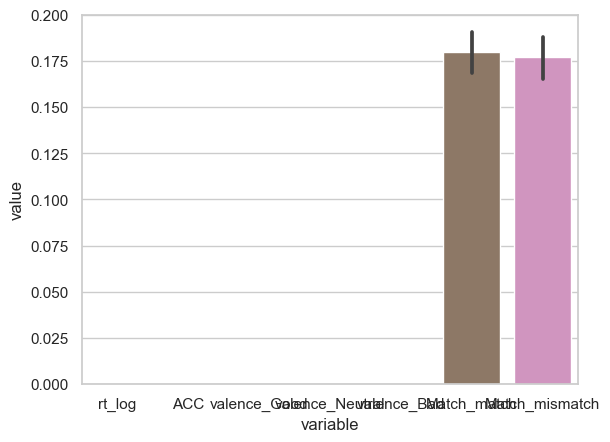

In [87]:
sns.set(style="whitegrid")
sns.barplot(plot, x = "variable", y = "value")

In [89]:
pipe_rf = make_pipeline(
    MinMaxScaler(), 
   RandomForestClassifier(n_estimators=10, bootstrap=False, random_state=123, class_weight="balanced", max_samples=None, n_jobs=-1)
)

In [106]:
sim_scores_rf = cross_validate(pipe_rf, X_sim, y_sim, groups=sim_groups, cv=logo, scoring=my_scores, return_estimator =True)

In [107]:
sim_scores_rf['test_score'].mean()

1.0

In [115]:
sim_scores_rf.best_estimator_

AttributeError: 'dict' object has no attribute 'best_estimator_'